In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [4]:
data = []
labels = []

directory = 'dataset/'
image_size = 64

for img_name in os.listdir(directory):
    img_path = os.path.join(directory, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (image_size, image_size))
        data.append(img.flatten())
        if 'cat' in img_name.lower():
            labels.append(0)
        elif 'dog' in img_name.lower():
            labels.append(1)

data = np.array(data)
labels = np.array(labels)

print("Total images:", len(data))
print("Image vector shape:", data[0].shape)


Total images: 100
Image vector shape: (4096,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)


In [6]:
svm_model = SVC(kernel='linear')  # Linear kernel works well for simple data
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [7]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.42      0.62      0.50         8

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.50        20
weighted avg       0.54      0.50      0.50        20



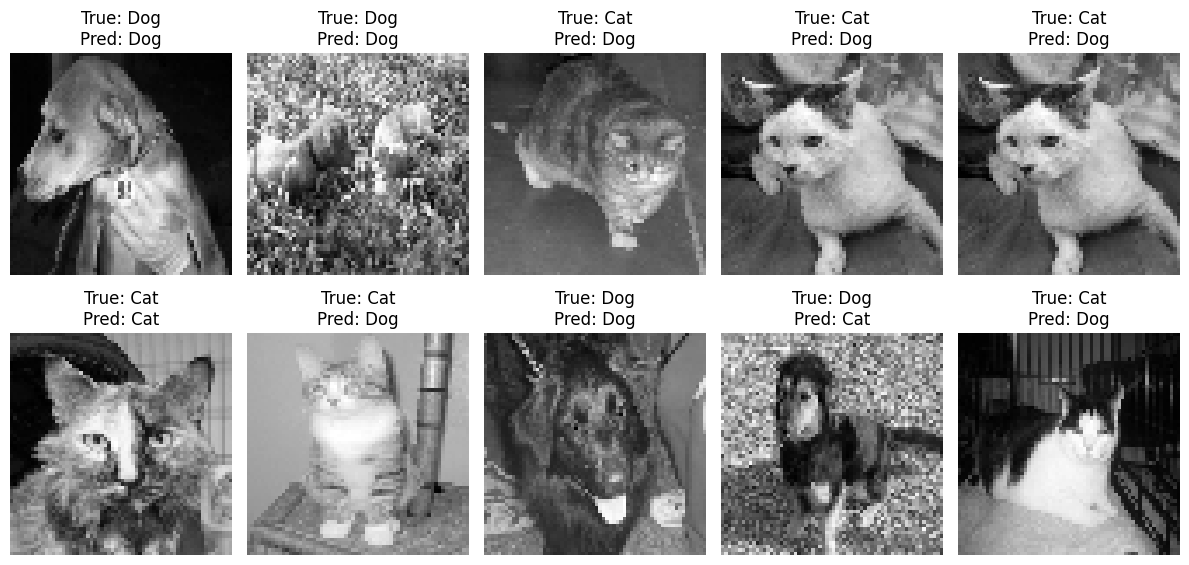

In [8]:
import random

plt.figure(figsize=(12, 6))
for i in range(10):
    index = random.randint(0, len(X_test) - 1)
    image = X_test[index].reshape(image_size, image_size)
    true_label = "Cat" if y_test[index] == 0 else "Dog"
    predicted_label = "Cat" if y_pred[index] == 0 else "Dog"

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
